In [1]:
from collections import Counter, defaultdict

import pandas as pd

# 1. Read Tab separated Data and Save Data as Comma separated file

In [2]:
df = pd.read_csv("data/posting.txt", sep="\t")
df.to_csv("data/posting.csv", index=False)

In [3]:
df_csv = pd.read_csv("data/posting.csv")

In [4]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      100 non-null    int64  
 1   keywords  100 non-null    object 
 2   traffic   100 non-null    int64  
 3   ratio     100 non-null    float64
 4   volume    100 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [5]:
df["traffict/volume"] = df.traffic / df.volume

In [6]:
df.head()

,rank,keywords,traffic,ratio,volume,traffict/volume
0,1,at most once,321,0.0052,800,0.401250
1,2,natsort,310,0.0051,2910,0.106529
2,3,엑셀 조건부서식 행 전체 적용,310,0.0051,480,0.645833
3,4,파이썬 표기법,300,0.0049,150,2.000000
4,5,리눅스 작업 예약,300,0.0049,430,0.697674


# 2. Count words frequency

In [7]:
all_words = []
for keyword in df.keywords:
    all_words.extend(keyword.split())

In [8]:
count_word_frequency_list = [
    [k, v] for k, v in zip(Counter(all_words).keys(), Counter(all_words).values())
]

In [9]:
zip(Counter(all_words).keys(), Counter(all_words).values(), Counter(all_words).values())

In [10]:
# Sort by word frequency descending
count_word_frequency_list.sort(key=lambda x: x[1], reverse=True)

In [11]:
count_word_frequency_list[:10]

[['엑셀', 12],
 ['mariadb', 7],
 ['공유폴더', 6],
 ['파이썬', 5],
 ['리눅스', 5],
 ['권한', 5],
 ['우분투', 5],
 ['조건부서식', 4],
 ['행', 4],
 ['linux', 4]]

In [12]:
len(count_word_frequency_list)

223

In [13]:
# 한글깨짐 해결
# 출처: https://wannabe00.tistory.com/entry/Mac%EC%97%90%EC%84%9C-Matplotlib-%EC%82%AC%EC%9A%A9-%EC%8B%9C-%ED%95%9C%EA%B8%80-%EA%B9%A8%EC%A7%90-%ED%95%B4%EA%B2%B0
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

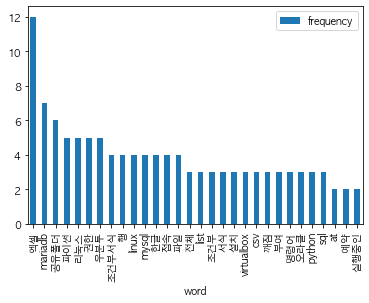

In [14]:
df_for_bar_plot = pd.DataFrame(
    count_word_frequency_list[:30], columns=["word", "frequency"]
)
df_for_bar_plot.plot.bar(x="word", y="frequency");

# 3. Count word frequency and sum word traffic

In [15]:
word_frequency_traffic_dict = defaultdict(dict)

for keyword, traffic in zip(df.keywords, df.traffic):
    words = keyword.split()
    for word in words:
        if word in word_frequency_traffic_dict:
            word_frequency_traffic_dict[word]["frequency"] += 1
            word_frequency_traffic_dict[word]["traffic"] += traffic
        else:
            word_frequency_traffic_dict[word] = {"frequency": 1, "traffic": traffic}

In [16]:
word_frequency_traffic_list = []
for k, v in zip(
    word_frequency_traffic_dict.keys(), list(word_frequency_traffic_dict.values())
):
    word_frequency_traffic_list.append([k, v["frequency"], v["traffic"]])

In [17]:
word_frequency_traffic_list.sort(key=lambda x: x[1], reverse=True)
word_frequency_traffic_list[:10]

[['엑셀', 12, 1837],
 ['mariadb', 7, 992],
 ['공유폴더', 6, 1000],
 ['파이썬', 5, 802],
 ['리눅스', 5, 1010],
 ['권한', 5, 735],
 ['우분투', 5, 755],
 ['조건부서식', 4, 727],
 ['행', 4, 727],
 ['linux', 4, 648]]

In [18]:
word_frequency_traffic_list.sort(key=lambda x: x[2], reverse=True)
word_frequency_traffic_list[:10]

[['엑셀', 12, 1837],
 ['리눅스', 5, 1010],
 ['공유폴더', 6, 1000],
 ['mariadb', 7, 992],
 ['파이썬', 5, 802],
 ['우분투', 5, 755],
 ['권한', 5, 735],
 ['조건부서식', 4, 727],
 ['행', 4, 727],
 ['linux', 4, 648]]

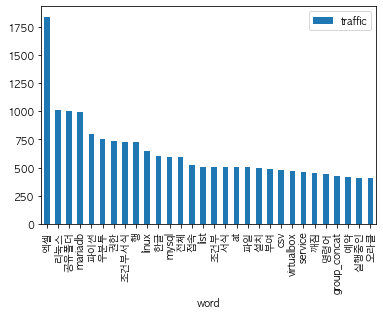

In [19]:
df_for_bar_plot = pd.DataFrame(
    word_frequency_traffic_list[:30], columns=["word", "frequency", "traffic"]
)
df_for_bar_plot.plot.bar(x="word", y="traffic");